In [2]:
import pyaudio
import wave

# Constants
FORMAT = pyaudio.paInt16  # Audio format
CHANNELS = 1              # Mono audio
RATE = 44100              # Sample rate
CHUNK = 1024              # Size of each audio chunk
DURATION = 5              # Duration in seconds

# Initialize PyAudio
audio = pyaudio.PyAudio()

# Open the stream for recording
stream = audio.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, frames_per_buffer=CHUNK)

print("Recording...")

frames = []

# Record for the specified duration
for _ in range(0, int(RATE / CHUNK * DURATION)):
    data = stream.read(CHUNK)
    frames.append(data)

print("Recording finished")

# Stop and close the stream
stream.stop_stream()
stream.close()

# Terminate PyAudio
audio.terminate()

# Save the recorded data to a WAV file
with wave.open('output.wav', 'wb') as wf:
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(audio.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))

print("File saved as output.wav")

Recording...
Recording finished
File saved as output.wav


In [6]:
import numpy as np

def calculate_rms(audio_chunk):
    """
    Calculate the Root Mean Square (RMS) value of an audio chunk.

    :param audio_chunk: The audio chunk as a bytes object.
    :return: The calculated RMS value.
    """
    # Convert the audio chunk to a numpy array of integers
    audio_data = np.frombuffer(audio_chunk, dtype=np.int16)
    
    # Calculate RMS
    rms = np.sqrt(np.mean(np.square(audio_data), axis=0))
    return rms

In [7]:
for frame in frames:
    print(calculate_rms(frame))

6.605513795307675
0.5528689379048166
0.4770105475773046
2.7952596592266703
5.75814640314051
10.686083604974275
10.51343077032897
12.754441628311293
8.321893189052597
8.601587335341076
13.003755467171782
11.598844904773923
7.838519172171488
17.97619411019752
14.330263267382774
15.01158406864512
11.110506710992079
12.1064210106662
12.245016524590728
7.492378940463436
8.569112410279141
5.856270010638171
8.812222956638127
7.43671214314498
11.181912012263377
12.485655832294112
12.416675405477909
15.756509071650358
26.69671971890929
21.022007627424646
17.450264145565246
16.064323826417343
18.642163861459323
19.728033670388946
21.853940755902585
14.70676927472516
20.226283372446357
25.95370352305235
24.9862071326362
19.574402329637042
16.881567009241174
12.190023777150724
17.196077405181683
6.125478297651539
6.436741460164452
8.672874379350828
8.012929005675765
12.807163522810193
10.326742059454181
8.157327515032113
15.052122981493342
13.835423568235994
10.029400140960576
7.769003917813403
18

In [11]:
audio = pyaudio.PyAudio()
stream = audio.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, frames_per_buffer=CHUNK)

rms = []
for _ in range(0, int(RATE / CHUNK * DURATION)):
    data = stream.read(CHUNK)
    rms.append(calculate_rms(data))

stream.stop_stream()
stream.close()
audio.terminate()

plt.plot(rms)
plt.show()

NameError: name 'plt' is not defined

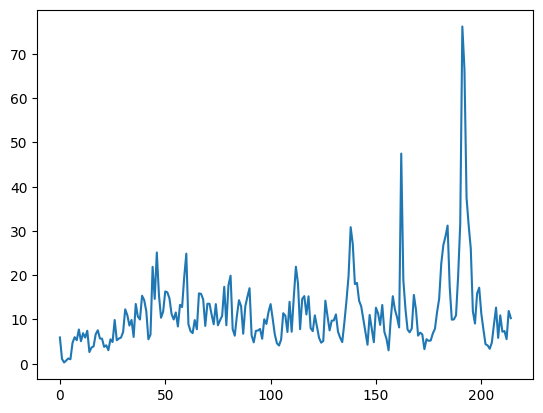

In [14]:
import matplotlib.pyplot as plt
plt.plot(rms)
plt.show()